# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Definitions](#definitions)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Random Probability Distribution](#random-probability-distribution)
    1. [Wind Speed](#wind-speed)
    2. [Gust Speed](#gust-speed)
    3. [Humidity](#humidity)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. 

The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). 

The extract contains local weather data captured over a 12 month period.

---

## Definitions <a id="definitions"></a>

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accesssed 8 Nov. 2023) - is an opensource software library for creating static, animated, and interactive visualizations in Python.
- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an opensource software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

---

## Dataset Exploration <a id="dataset-exploration"></a>

Import the Pandas software library. Pandas can be used to make datasets clean and process datasets.

In [43]:
# import the required python libraries
import pandas as pd

Read in the source data CSV file.

In [44]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

Visually inspect the top and bottom of the dataframe to ascertain if there is any obvious data quality issues. This is done using the Pandas `head()` and `tail()` methods. The frist and last 5 rows of data are checked.

In [45]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
0,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
1,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
3,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
4,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


In [46]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
352,27/10/2023 00:00,0.2,1.5,91.0,16.8,5.0,9.58,5.0,16.8,983.9
353,28/10/2023 00:00,0.5,2.2,91.0,17.0,6.7,10.32,6.7,17.0,980.4
354,29/10/2023 00:00,1.3,4.9,92.0,13.4,3.6,8.36,3.6,13.4,979.6
355,30/10/2023 00:00,0.0,0.6,93.0,13.9,4.7,8.94,4.7,13.9,989.5
356,31/10/2023 00:00,0.6,2.5,93.0,15.9,5.5,9.91,5.5,15.9,994.5


Using Pandas the column names can be renamed to make them python friendly.

In [47]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns can be seen in the output of this command. The Pandas Dtype (datatype) is displayed.

In [48]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       357 non-null    object 
 1   wind_speed_m_s                  356 non-null    float64
 2   gust_m_s                        356 non-null    float64
 3   humidity_%                      356 non-null    float64
 4   chill_celsius                   356 non-null    float64
 5   chill_minimum_celsius           356 non-null    float64
 6   temperature_average_celsius     356 non-null    float64
 7   temperature_range_low_celsius   356 non-null    float64
 8   temperature_range_high_celsius  356 non-null    float64
 9   outside_air_pres_hPa            356 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.0+ KB


The range index indicates that there are 357 rows in the dataset.

The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [49]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a quick visual check can be made to validate the changes. 

In [50]:
# quick visual validation of the changes to the dataframe
garden_weather.head()

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,
2022-11-09,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
2022-11-10,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2022-11-11,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
2022-11-12,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
2022-11-13,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


The dataset can be checked for missing values using the `isnull()` function chained with the `sum()` function.

In [51]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
outside_air_pres_hPa              1
dtype: int64

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesise or model the dataset the null values will need to be managed.

Inspect the dataset for any duplicate rows across all columns.

In [52]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,


No duplicate rows are demonstrated.

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 10 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | mm                | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | mm                | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |
| outside_air_pres_hPa          | numerical         | continuous    | float64       | hPa               | interval          |

\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendancy on these datatypes include mode, median and arithemtic mean (Bhandari, 2020). The measure of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [53]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.694663,5.188202,81.098315,17.388483,7.170506,11.589916,7.444382,17.445506,1012.151685
std,1.109269,2.966427,5.646277,6.571938,4.910919,5.112865,4.695277,6.499136,12.948221
min,0.000000,0.000000,60.000000,3.400000,-5.800000,-1.750000,-5.800000,3.400000,977.000000
25%,0.800000,3.000000,78.000000,11.775000,3.675000,7.730000,4.100000,11.800000,1004.375000
50%,1.500000,4.600000,81.000000,17.450000,7.600000,11.790000,7.750000,17.450000,1013.350000
75%,2.300000,6.700000,85.000000,23.100000,11.200000,15.517500,11.200000,23.100000,1020.650000
max,5.500000,15.600000,94.000000,32.800000,17.800000,22.510000,17.800000,32.800000,1045.200000


---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

In order synthesise variables in the dataset it is insightful to visually represent the day in order to understand how the data is distributed. This can be achieved using the Matplotlib library to create histigrams of the dataset variables.

In [54]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

A python function can be defined in order to test the best probability distribution fit for a dataset variable. The function defined below tests for the most commonly used probability distributions in weather data modelling. Literature on weather data probability modelling can be accessed [here](/journal_articles/). In the first instance the fit of the model recommended in the literature will be tested visually before using the `get_best_distribution()` function to test the best fit as indicated by the output of the function.

In [55]:
# adapted from code accessed here - https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023]
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'lognorm', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

Weather variables are subject to seasonal variation and therefore to create an accurate model of the dataset it becomes useful to break the data down by season. As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:
- Winter = November, December & January
- Spring = February, March & April
- Summer = May, June & July
- Autumn = August, September & October

In [56]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
winter_rows = winter.shape[0]
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
spring_rows = spring.shape[0]
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
summer_rows = summer.shape[0]
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)
autumn_rows = summer.shape[0]

Before any assessment of distribution fit or data modelling the presence of null values in the dataset must be addressed. This is achieved by replacing null them with the median value.

In [57]:
# replace nan values with the median - Zach (2022). The model could be unreliable if null values are not managed (Tamboli, 2021) 
autumn = autumn.fillna(autumn.median(numeric_only=True))

# check na values
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              0
dtype: int64

### Wind Speed <a id="wind-speed"></a>

Literature suggests that the Rayleigh distribution can be used to model wind speed. 

*Rayleigh's distribution can be used to describe the wind variations in a wind regime with an acceptable level of
accuracy without the need for data collected over short time intervals, as is the case of the Weibull distribution,
because in many cases, such information cannot be available.* (Paraschiv, Paraschiv and Ion, 2019).

The wind speed variable in the dataset is an average daily value which relative to an hourly value is a much longer time interval and therefore would be better suited to the Rayleigh model than the Weibull distribution.

The probability density function of the Rayleigh is expressed mathematically as:

$f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0,$

where $\sigma$ is the scale parameter of the distribution.

The graphic below illustrates the effect of scale ($\sigma$) on the Rayleigh distribution PDF.

**Rayleigh Distribution** - Krishnavedala, CC0, via Wikimedia Commons
![Rayleigh Distribution Curves](images/illustrations/768px-Rayleigh_distributionPDF.svg.png "Rayleigh Distribution Curve")

Using numpy it is possible to draw samples from the Rayleigh distribution. The python syntax of the Rayleigh distribution is `random.Generator.rayleigh(scale=1.0, size=None)`. The scale also equals the mode also equals the mode (numpy.org, n.d.).

Plotting histograms of the distribution of the wind speed variable gives an illustration of the fit of the probability distribution model.

Using the *scipy* library it is possible to calculate the Rayleigh parameters (location and scale), for each season, using the `fit()` method.

In [58]:
from scipy import stats

winter_loc, winter_scale = stats.rayleigh.fit(winter['wind_speed_m_s'])
spring_loc, spring_scale = stats.rayleigh.fit(spring['wind_speed_m_s'])
summer_loc, summer_scale = stats.rayleigh.fit(summer['wind_speed_m_s'])
autumn_loc, autumn_scale = stats.rayleigh.fit(autumn['wind_speed_m_s'])

/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()


Once the location and fit parameters are known they can be used to plot the probability density function over a histogram of the dataset to give a visual representation of the fit of the Rayleigh probability distribution function.

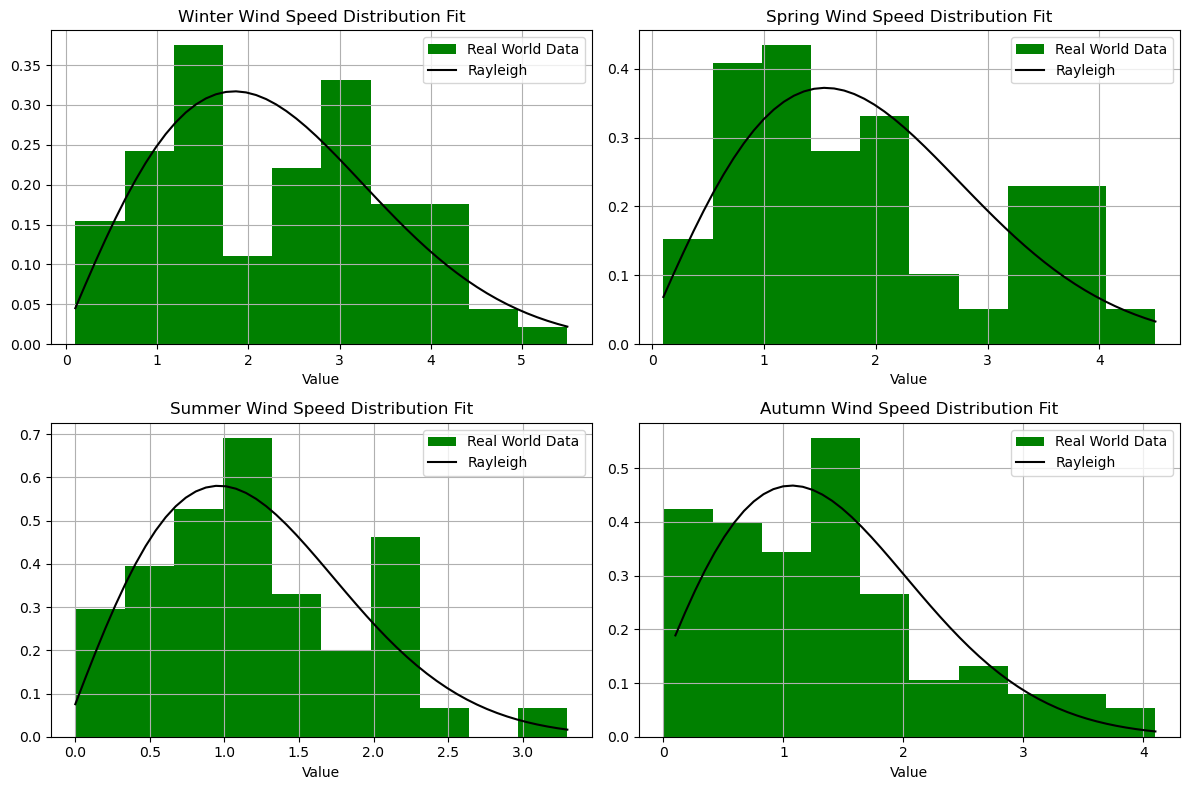

In [59]:
# code adapted from https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

winter_xl = np.linspace(winter['wind_speed_m_s'].min(), winter['wind_speed_m_s'].max())
spring_xl = np.linspace(spring['wind_speed_m_s'].min(), spring['wind_speed_m_s'].max())
summer_xl = np.linspace(summer['wind_speed_m_s'].min(), summer['wind_speed_m_s'].max())
autumn_xl = np.linspace(winter['wind_speed_m_s'].min(), autumn['wind_speed_m_s'].max())

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

# Display Results:
fig, axe = plt.subplots(2, 2)
axe[0, 0].hist(winter['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0, 0].plot(winter_xl,stats.rayleigh(scale=winter_scale, loc=winter_loc).pdf(winter_xl), label="Rayleigh", color='black')
axe[0, 0].set_title("Winter Wind Speed Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()
axe[0, 1].hist(spring['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0, 1].plot(spring_xl,stats.rayleigh(scale=spring_scale, loc=spring_loc).pdf(spring_xl), label="Rayleigh", color='black')
axe[0, 1].set_title("Spring Wind Speed Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()
axe[1, 0].hist(summer['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1, 0].plot(summer_xl,stats.rayleigh(scale=summer_scale, loc=summer_loc).pdf(summer_xl), label="Rayleigh", color='black')
axe[1, 0].set_title("Summer Wind Speed Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()
axe[1, 1].hist(autumn['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1, 1].plot(autumn_xl,stats.rayleigh(scale=autumn_scale, loc=autumn_loc).pdf(autumn_xl), label="Rayleigh", color='black')
axe[1, 1].set_title("Autumn Wind Speed Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()

The PDF of the Rayleigh distribution does not appear to be a good fit. This can be tested as follows:

In [60]:
get_best_distribution(winter['wind_speed_m_s'])

p value for norm = 0.23228918214908179
p value for exponweib = 0.6821732124385185
p value for weibull_max = 0.38566129228605156
p value for weibull_min = 0.3134560144469311
p value for pareto = 0.0036801920766574526
p value for genextreme = 0.38554702715412487
p value for rayleigh = 0.30027905452371295
p value for gamma = 0.21394575293435766
p value for uniform = 0.0015612000163419074
p value for lognorm = 0.2789986909420752
p value for logistic = 0.2589133152371838
p value for gumbel_r = 0.18104920664171462
p value for gumbel_l = 0.18902271045855537
Best fitting distribution: exponweib
Best p value: 0.6821732124385185
Parameters for the best fit: (0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695)


('exponweib',
 0.6821732124385185,
 (0.27503724293176923,
  4.5263439574972955,
  0.08118342282389561,
  3.839729030711695))

With a fit score $\approx$ 0.68 the *exponweib* distrubtion is the best fit out of commonly used weather probability distributions. The Exponentiated Weibull distribution is an extension of the Weibull distribution.

Expressed mathematically the density of of the Exponentiated Weibull distribution is:

$f(x;k,\lambda; \alpha) = \alpha  \frac{k}{\lambda}\left[\frac{x}{\lambda}\right]^{k-1}\left[1- e^{-(x/\lambda)^k} \right]^{\alpha-1}e^{-(x/\lambda)^k}$

k is the first shape parameter, α is the second shape parameter and λ is the scale parameter of the distribution.

The density can be plotted over the distribution with the following code:

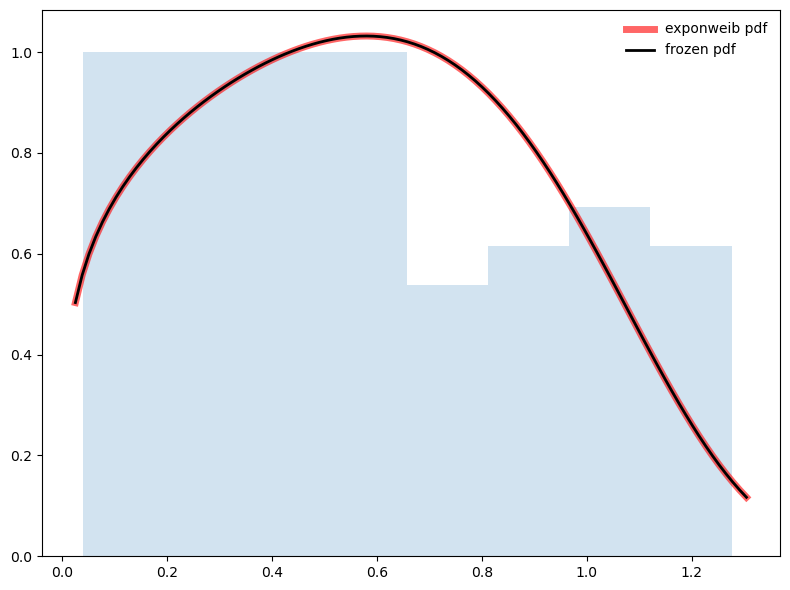

In [84]:
from scipy.stats import exponweib

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(1, 1)

a, c = 0.27503724293176923, 4.5263439574972955
x = np.linspace(exponweib.ppf(.01, a, c), exponweib.ppf(.99, a, c), 100)

ax.plot(x, exponweib.pdf(x, a, c), 'r-', lw=5, alpha=0.6, label='exponweib pdf')

rv = exponweib(a, c)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = exponweib.rvs(0.27503724293176923, 4.5263439574972955, size=winter_rows)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

#ax.set_xlim(x[0], x[-1])

ax.legend(loc='best', frameon=False)

plt.show()

The fit of the spring, summer and autumn distributions are tested.

In [86]:
get_best_distribution(spring['wind_speed_m_s'])

p value for norm = 0.07617592614118367


p value for exponweib = 0.39019897727106573
p value for weibull_max = 1.3217413892952783e-20
p value for weibull_min = 0.47039408529885784
p value for pareto = 0.00255161375718147
p value for genextreme = 0.3623343817087983
p value for rayleigh = 0.11745235041829949
p value for gamma = 0.46202825458196217
p value for uniform = 0.0007365910040409165
p value for lognorm = 0.44178348879461393
p value for logistic = 0.20954504734576707
p value for gumbel_r = 0.2971536312816363
p value for gumbel_l = 0.03022354822191329
Best fitting distribution: weibull_min
Best p value: 0.47039408529885784
Parameters for the best fit: (1.686915750837759, 0.05214958079737202, 2.0938087377064027)


('weibull_min',
 0.47039408529885784,
 (1.686915750837759, 0.05214958079737202, 2.0938087377064027))

In [87]:
get_best_distribution(summer['wind_speed_m_s'])

p value for norm = 0.23997214823393906
p value for exponweib = 0.7719226298736966
p value for weibull_max = 0.5989712129536761
p value for weibull_min = 0.770004317541185
p value for pareto = 0.0005393517857337438
p value for genextreme = 0.598836409969928
p value for rayleigh = 0.5652213116317228


/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()


p value for gamma = 0.8018594806457119
p value for uniform = 7.982765953962214e-07
p value for lognorm = 6.632739769324811e-24
p value for logistic = 0.33679859929828726


/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


p value for gumbel_r = 0.7331824706594361
p value for gumbel_l = 0.03727087425083094
Best fitting distribution: gamma
Best p value: 0.8018594806457119
Parameters for the best fit: (3.9808584667647784, -0.22352585228429497, 0.3622338090594752)


('gamma',
 0.8018594806457119,
 (3.9808584667647784, -0.22352585228429497, 0.3622338090594752))

In [88]:
get_best_distribution(autumn['wind_speed_m_s'])

p value for norm = 0.1477187985423232
p value for exponweib = 0.5527185148400212
p value for weibull_max = 0.7767269180865412
p value for weibull_min = 0.7697943410904002
p value for pareto = 0.0037193790775717143
p value for genextreme = 0.7084841512933477
p value for rayleigh = 0.3921527825122951
p value for gamma = 0.59407484405183
p value for uniform = 2.3408931999754745e-10


/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()
/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/sean/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


p value for lognorm = 1.5962149312016183e-24
p value for logistic = 0.6816608488086239
p value for gumbel_r = 0.7769400556069228
p value for gumbel_l = 0.0037989012783523116
Best fitting distribution: gumbel_r
Best p value: 0.7769400556069228
Parameters for the best fit: (0.9488315216541767, 0.7099317927216489)


('gumbel_r', 0.7769400556069228, (0.9488315216541767, 0.7099317927216489))

The best fit distribution for the wind speed variable are summarised as follows:

| Season    | Variable          |Best Fit Distribution      |
| :-----    | :-------          |:----------                |
| Winter    | wind_speed_m_s    | Exponentiated Weibull     |
| Spring    | wind_speed_m_s    | Weibull Minimum           |
| Summer    | wind_speed_m_s    | Gamma                     |
| Autumn    | wind_speed_m_s    | Gumbel Right Shifted      |

To model the data samples are randomly drawn from the relevant distributions:

In [110]:
from scipy.stats import weibull_min
from scipy.stats import gamma
from scipy.stats import gumbel_r

# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_wind_speed_model = exponweib.rvs(0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695, size = winter_rows)
spring_wind_speed_model = weibull_min.rvs(1.686915750837759, 0.05214958079737202, 2.0938087377064027, size = winter_rows)
summer_wind_speed_model = gamma.rvs(3.9808584667647784, -0.22352585228429497, 0.3622338090594752, size = winter_rows)
autumn_wind_speed_model = gumbel_r.rvs(0.9488315216541767, 0.7099317927216489, size = winter_rows)

[1.19284852 1.32587111 1.05915061 1.52126901 1.40766733 1.49129701
 0.67611884 0.73581247 2.21471082 1.79502985 2.05957805 0.59414991
 1.46874144 1.75043936 1.32669329 0.88040765 1.684629   2.07292315
 2.05312145 1.24923064 1.22595268 0.8472179  1.11017486 2.3735319
 3.07945474 1.68980483 2.20969711 0.72220917 1.29962804 2.68438057
 1.81311249 2.59128228 2.65857639 1.14938396 1.08494892 0.3700623
 0.99646909 1.0712216  0.46384758 0.99457065 2.55248796 0.65345969
 0.74699166 1.58003214 1.7811626  1.15247796 0.42252862 0.84878866
 0.68809197 0.91217862 1.46141494 2.11839868 1.49097539 1.11052518
 1.13882788 1.51886608 0.44735115 1.16704192 1.64486976 0.85315962
 0.85966577 1.12166595 1.4420531  1.13378883 0.38495567 1.49207653
 0.88753485 1.96452564 1.45760942 3.21506679 2.51805641 0.47946781
 0.46214631 0.45291364 0.72087391 4.72558149 0.67071806 2.84639297
 0.40425878 0.179283   1.12071801 1.52380059 1.13556858 0.76191906]


### Gust Speed <a id="gust-speed"></a>

As the gust speed variable is a measure of wind variations over time it can be modelled in the same as wind speed using Rayleigh distribution. 

Calculate the Rayleigh parameters (location and scale), for each season, using the 'fit()' method.

In [65]:
winter_gust_loc, winter_gust_scale = stats.rayleigh.fit(winter['gust_m_s'])
spring_gust_loc, spring_gust_scale = stats.rayleigh.fit(spring['gust_m_s'])
summer_gust_loc, summer_gust_scale = stats.rayleigh.fit(summer['gust_m_s'])
autumn_gust_loc, autumn_gust_scale = stats.rayleigh.fit(autumn['gust_m_s'])

Plot the Raleigh distribution and overlay the PDF in order to get a visual illustration of the model fit.

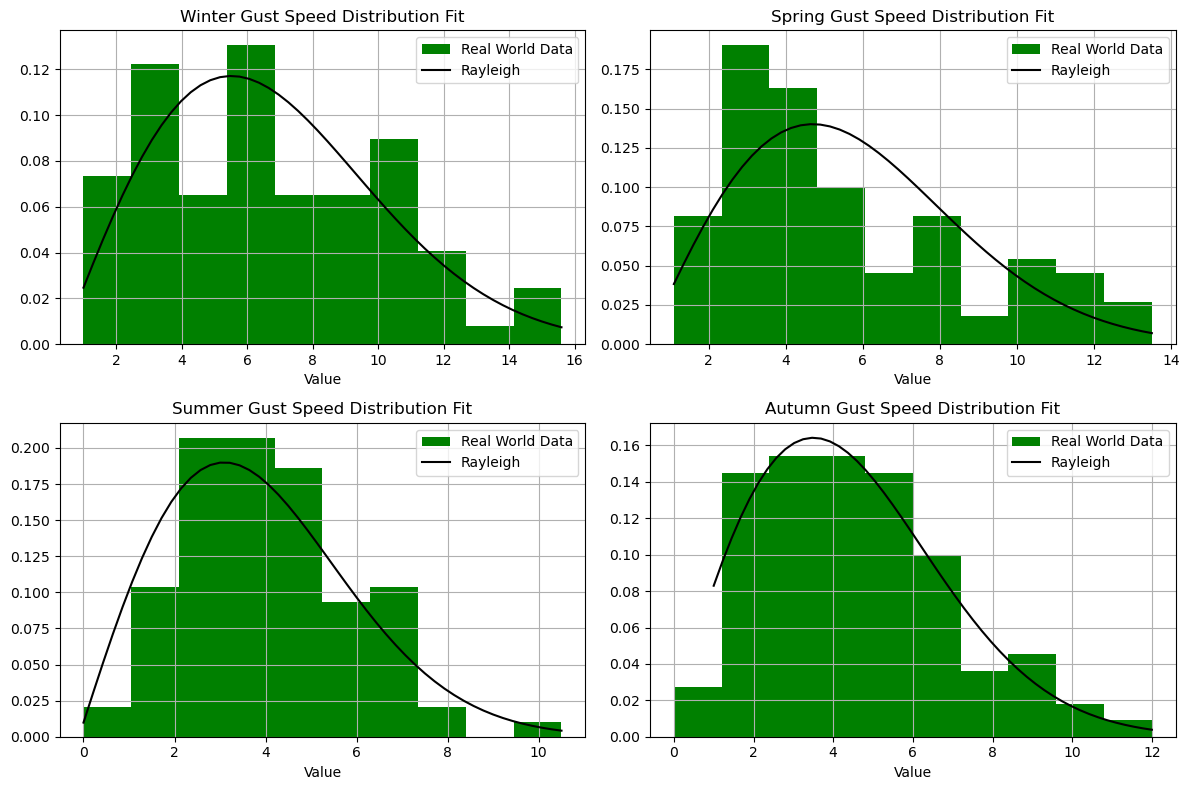

In [66]:
winter_gust_xl = np.linspace(winter['gust_m_s'].min(), winter['gust_m_s'].max())
spring_gust_xl = np.linspace(spring['gust_m_s'].min(), spring['gust_m_s'].max())
summer_gust_xl = np.linspace(summer['gust_m_s'].min(), summer['gust_m_s'].max())
autumn_gust_xl = np.linspace(winter['gust_m_s'].min(), autumn['gust_m_s'].max())

# Display Results:
fig, axe = plt.subplots(2, 2)
axe[0, 0].hist(winter['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0, 0].plot(winter_gust_xl,stats.rayleigh(scale=winter_gust_scale, loc=winter_gust_loc).pdf(winter_gust_xl), label="Rayleigh", color='black')
axe[0, 0].set_title("Winter Gust Speed Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()

axe[0, 1].hist(spring['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0, 1].plot(spring_gust_xl,stats.rayleigh(scale=spring_gust_scale, loc=spring_gust_loc).pdf(spring_gust_xl), label="Rayleigh", color='black')
axe[0, 1].set_title("Spring Gust Speed Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()

axe[1, 0].hist(summer['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1, 0].plot(summer_gust_xl,stats.rayleigh(scale=summer_gust_scale, loc=summer_gust_loc).pdf(summer_gust_xl), label="Rayleigh", color='black')
axe[1, 0].set_title("Summer Gust Speed Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()

axe[1, 1].hist(autumn['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1, 1].plot(autumn_gust_xl,stats.rayleigh(scale=autumn_gust_scale, loc=autumn_gust_loc).pdf(autumn_gust_xl), label="Rayleigh", color='black')
axe[1, 1].set_title("Autumn Gust Speed Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()

Text(0.5, 0.98, 'Seasonal Gust Speed Models')

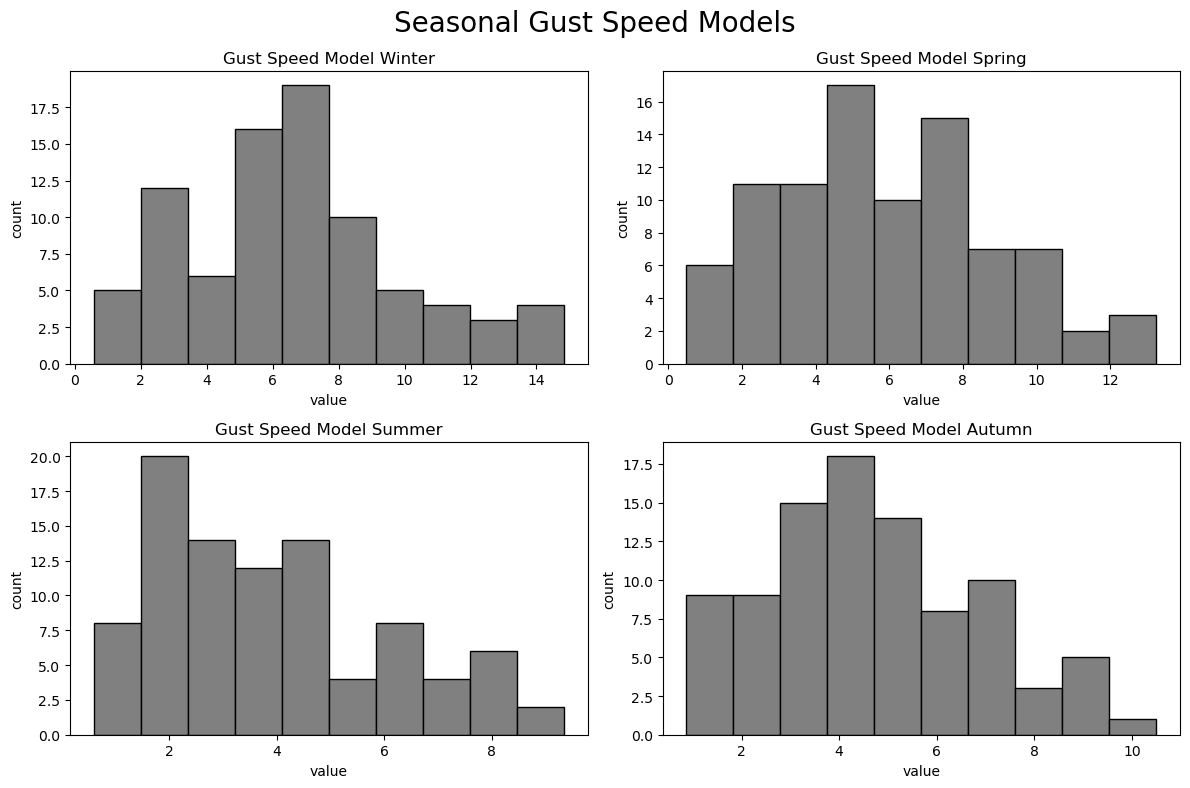

In [67]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

# draw randomly from rayleigh distributions for each season
model_gust_winter = np.random.rayleigh(winter_gust_scale, winter_rows)
model_gust_spring = np.random.rayleigh(spring_gust_scale, spring_rows)
model_gust_summer = np.random.rayleigh(summer_gust_scale, summer_rows)
model_gust_autumn = np.random.rayleigh(autumn_gust_scale, autumn_rows)

fig, axis = plt.subplots(2, 2)
axis[0, 0].hist(model_gust_winter, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 0].set_title("Gust Speed Model Winter")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(model_gust_spring, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 1].set_title("Gust Speed Model Spring")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(model_gust_summer, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 0].set_title("Gust Speed Model Summer")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(model_gust_autumn, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 1].set_title("Gust Speed Model Autumn")
axis[1, 1].set(xlabel='value', ylabel='count')
plt.suptitle('Seasonal Gust Speed Models', fontsize = 20)

Compare the KDE of the real world data and the modelled data.

### Humidity <a id="humidity"></a>

Literature suggests that the normal distribution is the best fit distribution for relative humidity probability modelling (Musa Esıt, 2022). Musa Esıt (2022) found that the normal distribution was the best probability fit for 2 out or 3 weather stations humidity data.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

In order to generate a sample of random normally distributed data the mean and standard deviation of the real world data are needed. Once these are known the data can be synthesised and histograms plotted.

In [68]:
winter_normal_humidity = np.random.normal(winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'], size = winter_rows)
spring_normal_humidity = np.random.normal(spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'], size = spring_rows)
summer_normal_humidity = np.random.normal(summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'], size = summer_rows)
autumn_normal_humidity = np.random.normal(autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'], size = autumn_rows)


In [69]:
winter_humidity_xl = np.linspace(winter.describe()['humidity_%']['min'], winter.describe()['humidity_%']['max'], winter_rows)
spring_humidity_xl = np.linspace(spring.describe()['humidity_%']['min'], spring.describe()['humidity_%']['max'], spring_rows)
summer_humidity_xl = np.linspace(summer.describe()['humidity_%']['min'], summer.describe()['humidity_%']['max'], summer_rows)
autumn_humidity_xl = np.linspace(autumn.describe()['humidity_%']['min'], autumn.describe()['humidity_%']['max'], autumn_rows)

In [70]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

norm_winter_humidity_pdf = normal_dist(winter_humidity_xl, winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'])
norm_spring_humidity_pdf = normal_dist(spring_humidity_xl, spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'])
norm_summer_humidity_pdf = normal_dist(summer_humidity_xl, summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'])
norm_autumn_humidity_pdf = normal_dist(autumn_humidity_xl, autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'])

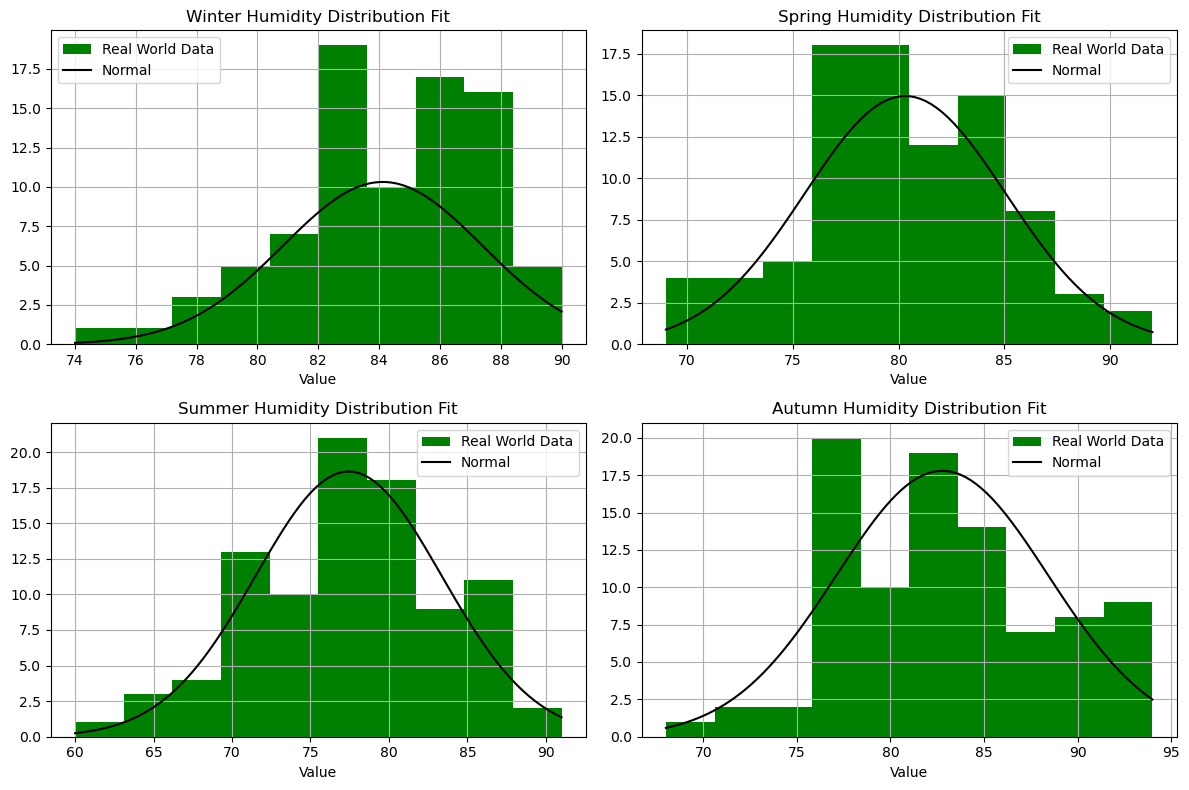

In [71]:
fig, axe = plt.subplots(2, 2)
axe[0, 0].hist(winter['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0, 0].plot(winter_humidity_xl, norm_winter_humidity_pdf, label="Normal", color='black')
axe[0, 0].set_title("Winter Humidity Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()

axe[0, 1].hist(spring['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0, 1].plot(spring_humidity_xl, norm_spring_humidity_pdf, label="Normal", color='black')
axe[0, 1].set_title("Spring Humidity Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()

axe[1, 0].hist(summer['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1, 0].plot(summer_humidity_xl, norm_summer_humidity_pdf, label="Normal", color='black')
axe[1, 0].set_title("Summer Humidity Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()

axe[1, 1].hist(autumn['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1, 1].plot(autumn_humidity_xl, norm_autumn_humidity_pdf, label="Normal", color='black')
axe[1, 1].set_title("Autumn Humidity Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()


Text(0.5, 0.98, 'Seasonal Humidity Models')

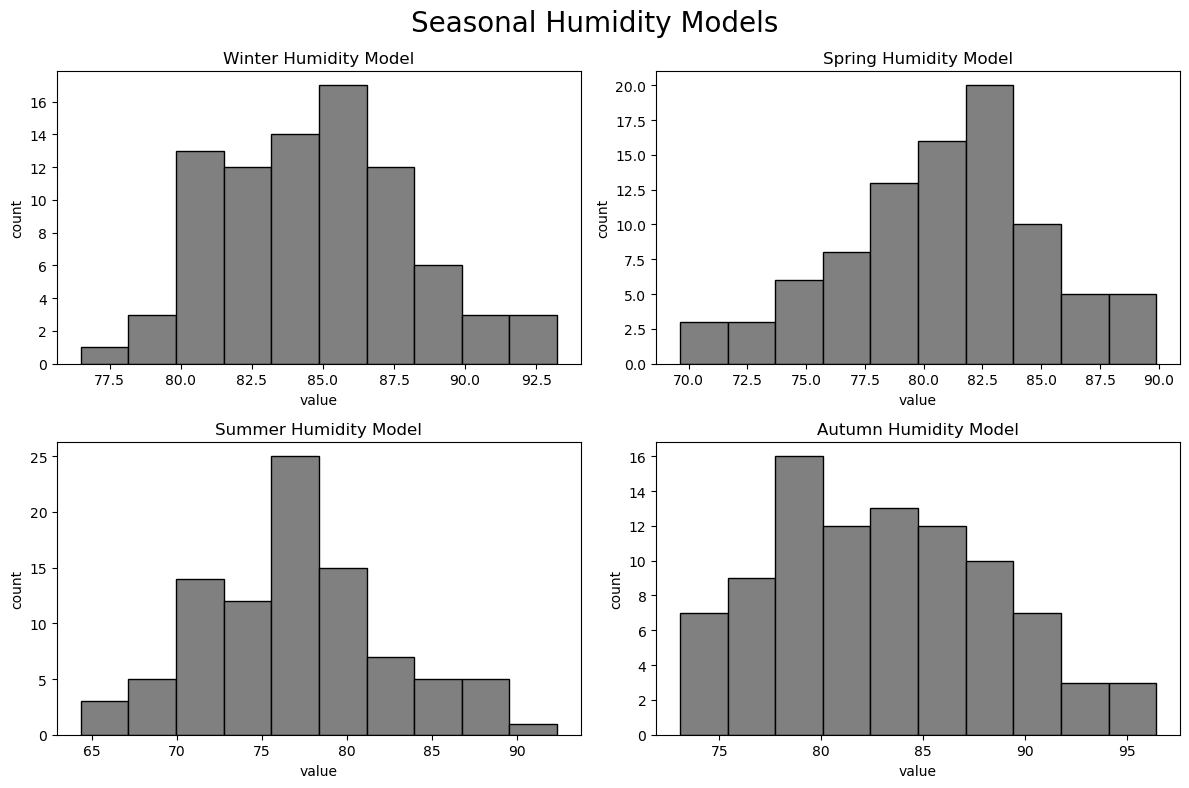

In [72]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

fig, axis = plt.subplots(2, 2)
axis[0, 0].hist(winter_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 0].set_title("Winter Humidity Model")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(spring_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 1].set_title("Spring Humidity Model")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(summer_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 0].set_title("Summer Humidity Model")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(autumn_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 1].set_title("Autumn Humidity Model")
axis[1, 1].set(xlabel='value', ylabel='count')
plt.suptitle('Seasonal Humidity Models', fontsize = 20)

### Chill <a id="chill"></a>

Wind chill is said to have a quasi-normal probability distribution  **ref


[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

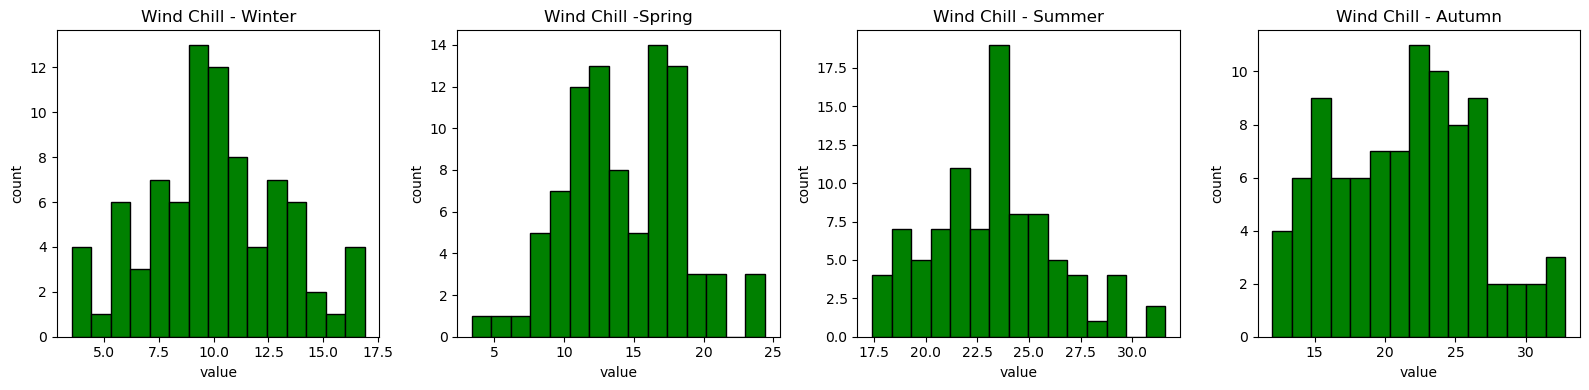

In [73]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Chill - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Chill -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Chill - Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Chill - Autumn")
axis[3].set(xlabel='value', ylabel='count')


In [74]:
winter_normal_chill = np.random.normal(winter.describe()['chill_celsius']['mean'], winter.describe()['chill_celsius']['std'], size = winter_rows)
spring_normal_chill = np.random.normal(spring.describe()['chill_celsius']['mean'], spring.describe()['chill_celsius']['std'], size = spring_rows)
summer_normal_chill = np.random.normal(summer.describe()['chill_celsius']['mean'], summer.describe()['chill_celsius']['std'], size = summer_rows)
autumn_normal_chill = np.random.normal(autumn.describe()['chill_celsius']['mean'], autumn.describe()['chill_celsius']['std'], size = autumn_rows)


[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

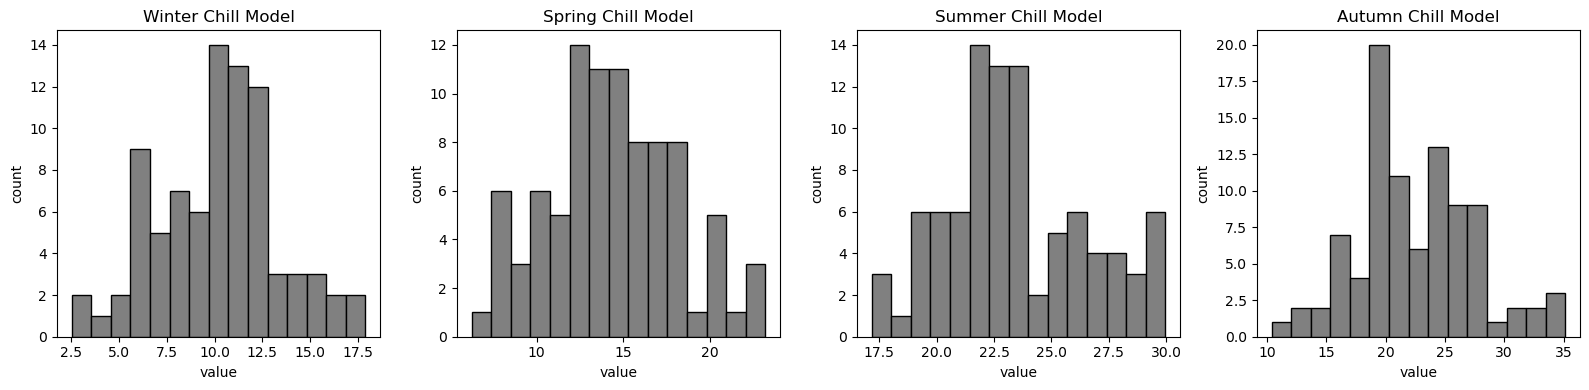

In [75]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Winter Chill Model")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Spring Chill Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Summer Chill Model")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Autumn Chill Model")
axis[3].set(xlabel='value', ylabel='count')

## Modelled Dataset <a id="modelled-dataset"></a>

Using the `pd.date_range()` method the time_series from the real world dataset can be created.

In [76]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 13 Nov. 2023].
dti = pd.date_range(start="2022-11-09", end='2023-10-31')


A new Pandas DataFrame is created and the generated time series is set as the index.

In [77]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti, columns = column_rename)
print(synthesised_dataset)

           date_time wind_speed_m_s gust_m_s humidity_% chill_celsius  \
2022-11-09       NaN            NaN      NaN        NaN           NaN   
2022-11-10       NaN            NaN      NaN        NaN           NaN   
2022-11-11       NaN            NaN      NaN        NaN           NaN   
2022-11-12       NaN            NaN      NaN        NaN           NaN   
2022-11-13       NaN            NaN      NaN        NaN           NaN   
...              ...            ...      ...        ...           ...   
2023-10-27       NaN            NaN      NaN        NaN           NaN   
2023-10-28       NaN            NaN      NaN        NaN           NaN   
2023-10-29       NaN            NaN      NaN        NaN           NaN   
2023-10-30       NaN            NaN      NaN        NaN           NaN   
2023-10-31       NaN            NaN      NaN        NaN           NaN   

           chill_minimum_celsius temperature_average_celsius  \
2022-11-09                   NaN                         Na

Concatenate the seasonal data for each variable into to one array and assign a variable for the array that corresponds to the modelled variable.

In [78]:

# code adapted from - https://sparkbyexamples.com/python/numpy-concatenate-arrays/ [Accessed 13 Nov. 2023]
wind_speed_model = np.concatenate((model_ws_winter, model_ws_spring, model_gust_summer, model_ws_autumn))
gust_speed_model = np.concatenate((model_gust_winter, model_gust_spring, model_gust_summer, model_gust_autumn))
humidity_model = np.concatenate((winter_normal_humidity, spring_normal_humidity, summer_normal_humidity, autumn_normal_humidity))

Assign the modelled data to a column in the sythesised DataFrame.

In [79]:
synthesised_dataset['wind_speed_m_s'] = wind_speed_model
synthesised_dataset['gust_m_s'] = gust_speed_model
synthesised_dataset['humidity_%'] = humidity_model
#print(type(synthesised_dataset))
print(synthesised_dataset)
#print(synthesised_dataset.info())

           date_time  wind_speed_m_s   gust_m_s  humidity_% chill_celsius  \
2022-11-09       NaN        2.047296  13.534645   84.166827           NaN   
2022-11-10       NaN        0.438466   6.522263   82.753777           NaN   
2022-11-11       NaN        2.416327  13.902784   91.789467           NaN   
2022-11-12       NaN        2.045165   8.207084   83.307949           NaN   
2022-11-13       NaN        1.997848   8.014500   84.097483           NaN   
...              ...             ...        ...         ...           ...   
2023-10-27       NaN        2.988599   4.042957   86.835561           NaN   
2023-10-28       NaN        2.517737   1.447874   75.010273           NaN   
2023-10-29       NaN        2.487117   4.221236   83.309902           NaN   
2023-10-30       NaN        3.220979   5.041143   85.994475           NaN   
2023-10-31       NaN        0.091420  10.505096   79.335432           NaN   

           chill_minimum_celsius temperature_average_celsius  \
2022-11-09 

## Correlation <a id="correlation"></a>

In [80]:
corr_variable = garden_weather.iloc[0:, 1:].corr()
corr_variable


,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
wind_speed_m_s,1.000000,0.954386,0.067862,-0.341307,-0.241761,-0.267984,-0.164783,-0.329037,-0.366696
gust_m_s,0.954386,1.000000,0.059488,-0.306218,-0.190139,-0.222608,-0.112706,-0.293935,-0.359218
humidity_%,0.067862,0.059488,1.000000,-0.360723,-0.129238,-0.287734,-0.128914,-0.363796,-0.430119
chill_celsius,-0.341307,-0.306218,-0.360723,1.000000,0.821574,0.944008,0.805994,0.999448,0.142797
chill_minimum_celsius,-0.241761,-0.190139,-0.129238,0.821574,1.000000,0.939324,0.991965,0.821406,0.063478
temperature_average_celsius,-0.267984,-0.222608,-0.287734,0.944008,0.939324,1.000000,0.933332,0.945086,0.105981
temperature_range_low_celsius,-0.164783,-0.112706,-0.128914,0.805994,0.991965,0.933332,1.000000,0.807931,0.027435
temperature_range_high_celsius,-0.329037,-0.293935,-0.363796,0.999448,0.821406,0.945086,0.807931,1.000000,0.139753
outside_air_pres_hPa,-0.366696,-0.359218,-0.430119,0.142797,0.063478,0.105981,0.027435,0.139753,1.000000


In [81]:
# garden_pivot = garden_weather.pivot(index='date_time', columns='wind_speed_m_s')
sns.heatmap(corr_variable)

NameError: name 'sns' is not defined

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Malli (2022). How To Concatenate NumPy Arrays. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/python/numpy-concatenate-arrays/. [Accessed 13 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Musa Esıt (2022). The Determination of the Most Appropriate Probability Distribution Models for the Meteorological Variables. Bitlis Eren üniversitesi fen bilimleri dergisi, 11(4), pp.1026–1041. doi:https://doi.org/10.17798/bitlisfen.1168077. [Accessed 10 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

numpy.org. (n.d.). numpy.random.Generator.rayleigh — NumPy v1.26 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.rayleigh.html#numpy.random.Generator.rayleigh [Accessed 10 Nov. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [Accessed 13 Nov. 2023].

pandas.pydata.org. (n.d.). Time series / date functionality — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/timeseries.html. [Accessed 13 Nov. 2023].

Paraschiv, L.-S., Paraschiv, S. and Ion, I.V. (2019). Investigation of wind power density distribution using Rayleigh probability density function. Energy Procedia, 157, pp.1546–1552. doi:https://doi.org/10.1016/j.egypro.2018.11.320. [Accesed 10 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How to find probability distribution and parameters for real data? (Python 3). [online] Available at: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023].

Stack Overflow. (n.d.). python: rayleigh fit (histogram). [online] Available at: https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*